## Урок 3. Кейс 1. Работа с признаками и селекция

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import warnings
import itertools

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
def test_ts_stationarity(ts):
    ma = ts.rolling(12).mean()
    std = ts.rolling(12).std()
    plt.figure(figsize=(12, 10))
    orig = plt.plot(ts, color='blue', label='Original')
    mean = plt.plot(ma, color='red', label='Rolling mean')
    std = plt.plot(std, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title("Rolling mean & std")
    plt.show()
    #adf test
    print("Results of DF test:")
    dftest = adfuller(ts, autolag='AIC')
    df_test = pd.DataFrame(dftest[:-1])
    df_test.index = ['Test statistic', 'p_value', 'lags', 'num observations', 'critical values']
    print(df_test)

#### 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по 1 месяцу.

In [32]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [33]:
m_data = data.resample('M').mean()
m_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


#### 2. Подберите параметры модели SARIMAX для этого ряда.

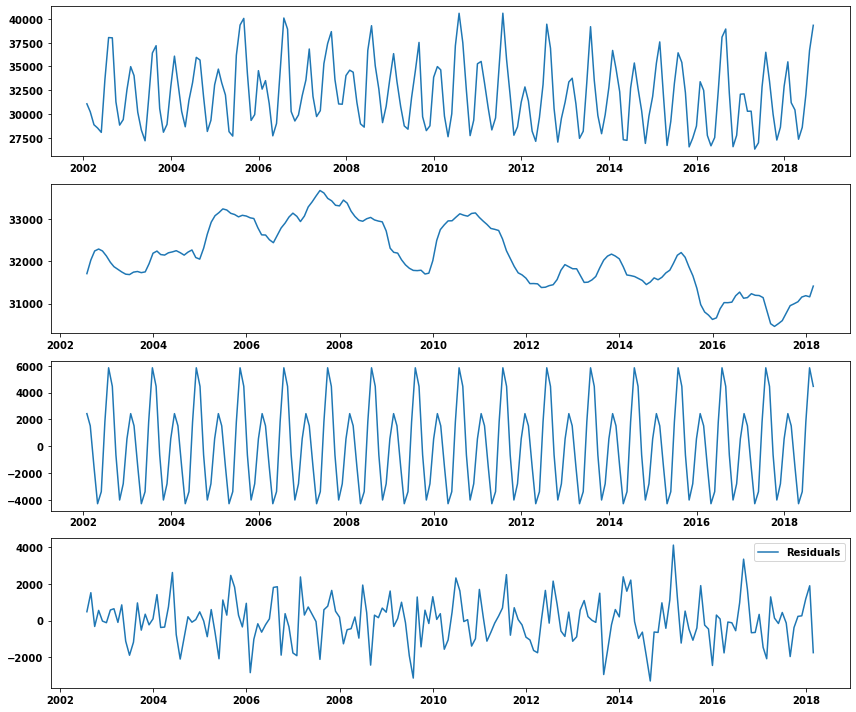

In [34]:
dec = seasonal_decompose(m_data['PJME_MW'])
trend = dec.trend
seasonal = dec.seasonal
residuals = dec.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(m_data['PJME_MW'], label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

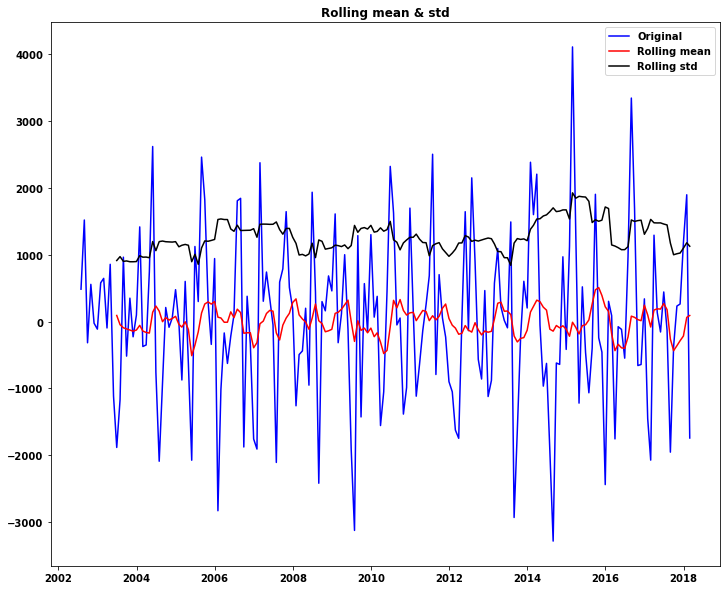

Results of DF test:
                                                                  0
Test statistic                                             -7.62394
p_value                                                 2.09272e-11
lags                                                             14
num observations                                                173
critical values   {'1%': -3.4687256239864017, '5%': -2.878396137...


In [35]:
test_ts_stationarity(residuals.dropna())

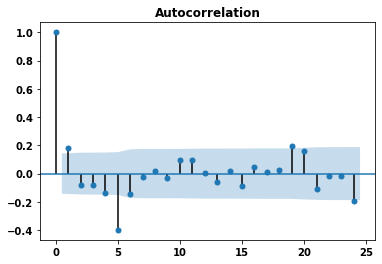

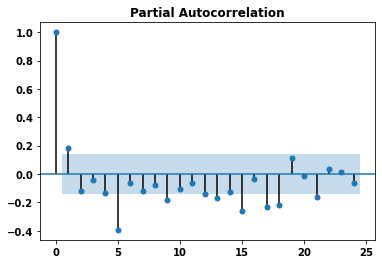

In [36]:
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=24)
plt.show()

In [37]:
# Определим p, d и q в диапазоне 0-2
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = range(0, 3)
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [38]:
warnings.filterwarnings("ignore") # отключает предупреждения

min_aic = float('inf')
param_for_min = []
param_seasonal_for_min = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values[:-10],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            if results.aic < min_aic:
                min_aic = results.aic
                param_for_min = param
                param_seasonal_for_min = param_seasonal
                
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
print(f'Параметры для минимального AIC = {min_aic}: pdq = {param_for_min}, seasonal_pdq = {param_seasonal_for_min}')

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4463.051035665778
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4060.74446864495
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3759.5420884158566
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3189.1047595620007
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2962.9009172045553
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2730.1055290309014
ARIMA(0, 0, 0)x(1, 0, 0, 12)3 - AIC:3211.259039000882
ARIMA(0, 0, 0)x(1, 0, 1, 12)3 - AIC:3191.049774025445
ARIMA(0, 0, 0)x(1, 0, 2, 12)3 - AIC:2941.915382582245
ARIMA(0, 0, 0)x(1, 1, 0, 12)3 - AIC:2972.189893609415
ARIMA(0, 0, 0)x(1, 1, 1, 12)3 - AIC:2955.247980747777
ARIMA(0, 0, 0)x(1, 1, 2, 12)3 - AIC:2722.4468625683885
ARIMA(0, 0, 0)x(2, 0, 0, 12)3 - AIC:2973.294378691268
ARIMA(0, 0, 0)x(2, 0, 1, 12)3 - AIC:2975.4949049114866
ARIMA(0, 0, 0)x(2, 0, 2, 12)3 - AIC:2930.070883616948
ARIMA(0, 0, 0)x(2, 1, 0, 12)3 - AIC:2741.113075753251
ARIMA(0, 0, 0)x(2, 1, 1, 12)3 - AIC:2737.6955220466284
ARIMA(0, 0, 0)x(2, 1, 2, 12)3 - AIC:2722.744746904651
ARIMA(0, 0, 1)x(0, 0, 

ARIMA(0, 2, 2)x(1, 0, 1, 12)3 - AIC:3084.47562842786
ARIMA(0, 2, 2)x(1, 0, 2, 12)3 - AIC:2875.7170637794907
ARIMA(0, 2, 2)x(1, 1, 0, 12)3 - AIC:2984.6498060643607
ARIMA(0, 2, 2)x(1, 1, 1, 12)3 - AIC:2905.6999694463043
ARIMA(0, 2, 2)x(1, 1, 2, 12)3 - AIC:2692.3911139562983
ARIMA(0, 2, 2)x(2, 0, 0, 12)3 - AIC:3012.1592285577535
ARIMA(0, 2, 2)x(2, 0, 1, 12)3 - AIC:3005.2496001249224
ARIMA(0, 2, 2)x(2, 0, 2, 12)3 - AIC:2948.1477386064303
ARIMA(0, 2, 2)x(2, 1, 0, 12)3 - AIC:2759.5884099403966
ARIMA(0, 2, 2)x(2, 1, 1, 12)3 - AIC:2745.920137108952
ARIMA(0, 2, 2)x(2, 1, 2, 12)3 - AIC:2694.2838846732466
ARIMA(1, 0, 0)x(0, 0, 0, 12)3 - AIC:3622.3124318531886
ARIMA(1, 0, 0)x(0, 0, 1, 12)3 - AIC:3299.9489026934825
ARIMA(1, 0, 0)x(0, 0, 2, 12)3 - AIC:3089.9934601866144
ARIMA(1, 0, 0)x(0, 1, 0, 12)3 - AIC:3167.3438051514504
ARIMA(1, 0, 0)x(0, 1, 1, 12)3 - AIC:2938.183022195671
ARIMA(1, 0, 0)x(0, 1, 2, 12)3 - AIC:2700.2977380549755
ARIMA(1, 0, 0)x(1, 0, 0, 12)3 - AIC:3266.842863071316
ARIMA(1, 0, 0)x

ARIMA(1, 2, 1)x(2, 0, 2, 12)3 - AIC:2904.4244854267636
ARIMA(1, 2, 1)x(2, 1, 0, 12)3 - AIC:2723.6379967349717
ARIMA(1, 2, 1)x(2, 1, 1, 12)3 - AIC:2733.545179874499
ARIMA(1, 2, 1)x(2, 1, 2, 12)3 - AIC:2715.9084313480425
ARIMA(1, 2, 2)x(0, 0, 0, 12)3 - AIC:3558.3171716818924
ARIMA(1, 2, 2)x(0, 0, 1, 12)3 - AIC:3239.504282173248
ARIMA(1, 2, 2)x(0, 0, 2, 12)3 - AIC:2999.8733813742306
ARIMA(1, 2, 2)x(0, 1, 0, 12)3 - AIC:3184.9250349967306
ARIMA(1, 2, 2)x(0, 1, 1, 12)3 - AIC:2897.338664912836
ARIMA(1, 2, 2)x(0, 1, 2, 12)3 - AIC:2684.218527981221
ARIMA(1, 2, 2)x(1, 0, 0, 12)3 - AIC:3192.05621419868
ARIMA(1, 2, 2)x(1, 0, 1, 12)3 - AIC:3146.601260907616
ARIMA(1, 2, 2)x(1, 0, 2, 12)3 - AIC:2921.671726342174
ARIMA(1, 2, 2)x(1, 1, 0, 12)3 - AIC:2966.9596743466554
ARIMA(1, 2, 2)x(1, 1, 1, 12)3 - AIC:2897.85715743277
ARIMA(1, 2, 2)x(1, 1, 2, 12)3 - AIC:2686.037281082574
ARIMA(1, 2, 2)x(2, 0, 0, 12)3 - AIC:2964.6835686358186
ARIMA(1, 2, 2)x(2, 0, 1, 12)3 - AIC:2958.1551529370854
ARIMA(1, 2, 2)x(2, 0,

ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:2915.7568411430266
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2670.5013465356496
ARIMA(2, 2, 1)x(1, 0, 0, 12)3 - AIC:3172.3535983514857
ARIMA(2, 2, 1)x(1, 0, 1, 12)3 - AIC:3155.486047168363
ARIMA(2, 2, 1)x(1, 0, 2, 12)3 - AIC:2885.7889388618664
ARIMA(2, 2, 1)x(1, 1, 0, 12)3 - AIC:2926.6543255853394
ARIMA(2, 2, 1)x(1, 1, 1, 12)3 - AIC:2903.0818675427527
ARIMA(2, 2, 1)x(1, 1, 2, 12)3 - AIC:2672.1535459548804
ARIMA(2, 2, 1)x(2, 0, 0, 12)3 - AIC:2911.7222353697807
ARIMA(2, 2, 1)x(2, 0, 1, 12)3 - AIC:2975.0656012176164
ARIMA(2, 2, 1)x(2, 0, 2, 12)3 - AIC:2909.1669999758906
ARIMA(2, 2, 1)x(2, 1, 0, 12)3 - AIC:2694.750935966638
ARIMA(2, 2, 1)x(2, 1, 1, 12)3 - AIC:2672.4474030361744
ARIMA(2, 2, 1)x(2, 1, 2, 12)3 - AIC:2671.3624815900976
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3374.321320319553
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3151.034049263727
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:2937.628745600757
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:3175.3723866914706
ARIMA(2, 2, 2)x

In [39]:
#для построения модели используем все данные, кроме 10-и последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values[:-10],
                                order=param_for_min,
                                seasonal_order=param_seasonal_for_min,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2639.1243773276947


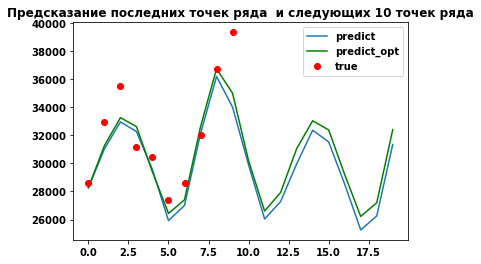

In [40]:
pred_dynamic = results.forecast(20)  
pred_dynamic_opt = results_opt.forecast(20)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(m_data['PJME_MW'].values[-10:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 10 точек ряда')
plt.legend()

plt.show()

In [41]:
print(results.summary().tables[0],results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  190
Model:             SARIMAX(2, 2, 2)x(2, 1, 2, 12)   Log Likelihood               -1328.905
Date:                            Mon, 13 Jul 2020   AIC                           2675.810
Time:                                    16:04:52   BIC                           2702.846
Sample:                                         0   HQIC                          2686.794
                                            - 190                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

#### 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Месячные исходные данные более грубые, в них меньше нюансов чем в недельных, поэтому такие данные моделировать проще. 
Соответственно месячная модель получилась более точная чем недельная.

#### 4. Возмите вариант 1 или 2
Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)<br>
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [8]:
# Вариант 1)
data = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])
w_data = data.resample('W').mean()
w_data.dropna(inplace=True)
w_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


C:\Users\rseme\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


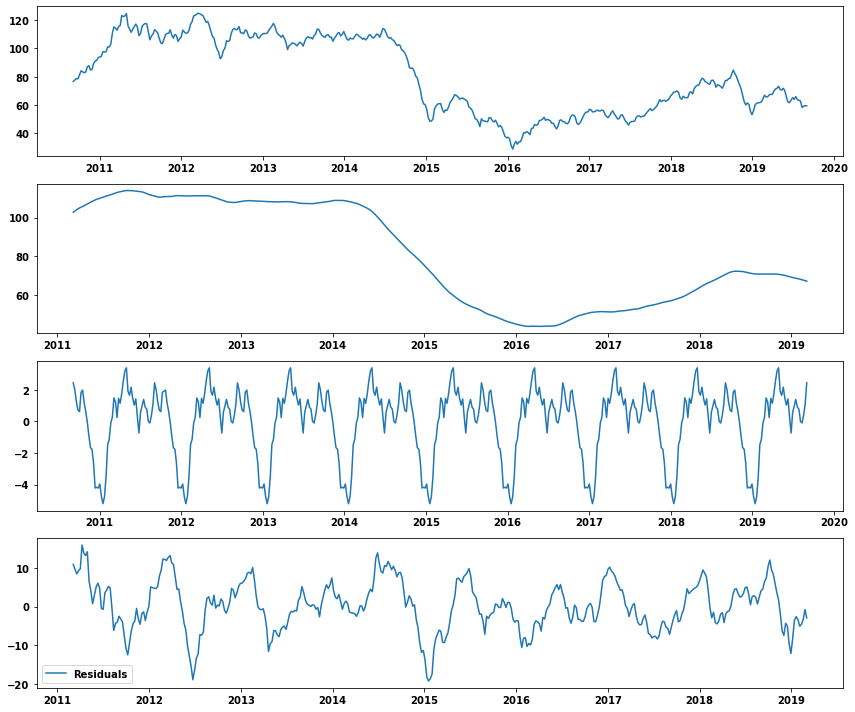

In [9]:
dec = seasonal_decompose(w_data['Значение'], freq = 52)
trend = dec.trend
seasonal = dec.seasonal
residuals = dec.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(w_data['Значение'], label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.subplot(414)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

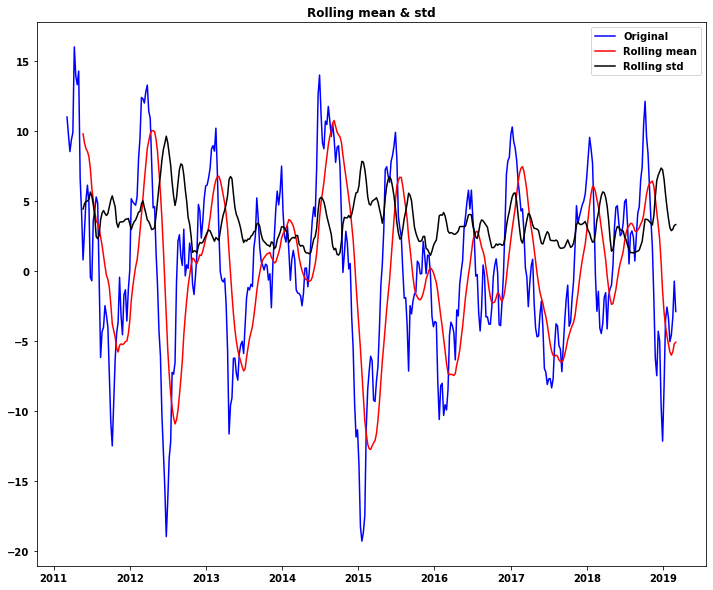

Results of DF test:
                                                                  0
Test statistic                                             -6.74311
p_value                                                 3.08288e-09
lags                                                              8
num observations                                                408
critical values   {'1%': -3.446479704252724, '5%': -2.8686500930...


In [10]:
test_ts_stationarity(residuals.dropna())

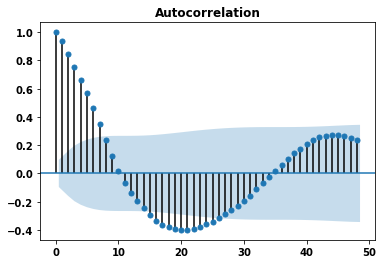

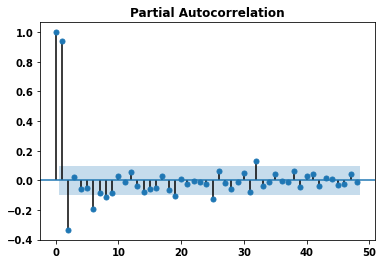

In [11]:
sm.graphics.tsa.plot_acf(residuals.dropna(), lags=48)
plt.show()

sm.graphics.tsa.plot_pacf(residuals.dropna(), lags=48)
plt.show()

#### 5. Оцените результат моделирования

In [7]:
# Определим p, d и q
p = range(0, 8)
d = [0, 1]
q = range(0, 2)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
p = range(0, 8)
d = [0, 1]
q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (6, 1, 1) x (6, 0, 1, 52)
SARIMAX: (6, 1, 1) x (6, 0, 0, 52)
SARIMAX: (7, 0, 1) x (6, 0, 0, 52)
SARIMAX: (7, 0, 1) x (6, 0, 1, 52)


In [12]:
warnings.filterwarnings("ignore") # отключает предупреждения

min_aic = float('inf')
param_for_min = []
param_seasonal_for_min = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(w_data['Значение'].values[:-10],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            
            if results.aic < min_aic:
                min_aic = results.aic
                param_for_min = param
                param_seasonal_for_min = param_seasonal
                
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
print(f'Параметры для минимального AIC = {min_aic}: pdq = {param_for_min}, seasonal_pdq = {param_seasonal_for_min}')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\rseme\.conda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-f3b658f1f94b>", line 8, in <module>
    for param_seasonal in seasonal_pdq:
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rseme\.conda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\rseme\.conda\envs\tf-gpu\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\rseme\.conda\env

TypeError: object of type 'NoneType' has no len()

##### Предыдущая ячейка очень долго считала. Не дождался и посчитал только для одного значения

In [ ]:
#для построения модели используем все данные, кроме 10-и последних недель (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

param_for_min = [7, 1, 1]
param_seasonal_for_min = [7, 1, 1, 52]

mod = sm.tsa.statespace.SARIMAX(w_data['Значение'].values[:-10],
                                order=param_for_min,
                                seasonal_order=param_seasonal_for_min,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

In [ ]:
pred_dynamic = results.forecast(20)  
pred_dynamic_opt = results_opt.forecast(20)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(w_data['Значение'].values[-10:],'or',label='true')
plt.title('Предсказание последних точек ряда и следующих 10 точек ряда')
plt.legend()

plt.show()

In [ ]:
print(results.summary().tables[0],results.summary().tables[1])

#### 6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

Лучше всего работают ряды которые хорошо коррелируют сами с собой, при этом допускается наличие тренда и сезонности